In [200]:
from qutip import sigmax, sigmay, destroy, tensor, qeye, sigmaz
import numpy as np
from weylchamber import c1c2c3
import matplotlib.pyplot as plt

a = tensor(destroy(2), qeye(2))
b = tensor(qeye(2), destroy(2))
xx = tensor(sigmax(), sigmax())
yy = tensor(sigmay(), sigmay())
zz = tensor(sigmaz(), sigmaz())
iz = tensor(qeye(2), sigmaz())
zi = tensor(sigmaz(), qeye(2))
ix = tensor(qeye(2), sigmax())
xi = tensor(sigmax(), qeye(2))

# stark shift term, (1/2) * (qeye(2) + -1 * (sigmaz()))

In [201]:
def H(c, g):
    # Heff = 1 / 2 * (c + g) * xx + 1 / 2 * (c - g) * yy
    # q1_stark_shift = c * np.pi / 2
    # q2_stark_shift = c * np.pi / 2
    # Heff += q1_stark_shift * (a.dag() * a)
    # Heff += q2_stark_shift * (b.dag() * b)
    # return Heff
    return np.pi / 2 * (a.dag() * b + a * b.dag()) + (np.pi / 8 * ix) + (np.pi / 8 * xi)


Heff = H(np.pi / 2, 0)

In [202]:
def flow_c(t, c, g):
    Heff = H(c, g)
    Ueff = (-1j * Heff * t).expm()
    c1, c2, c3 = c1c2c3(Ueff)
    return c1, c2, c3


def flow_g(t, c, g):
    g1 = 1 / 4 * (np.cos(2 * c * t) + np.cos(2 * g * t)) ** 2
    g2 = 1 + np.cos(2 * (c - g) * t) + np.cos(2 * (c + g) * t)
    return g1, g2

In [203]:
c_values = np.array([np.pi / 2])  # , np.pi / 4, 3 * np.pi / 8])
g_values = np.array([0])  # , np.pi / 4, np.pi / 8])
t_max = np.pi

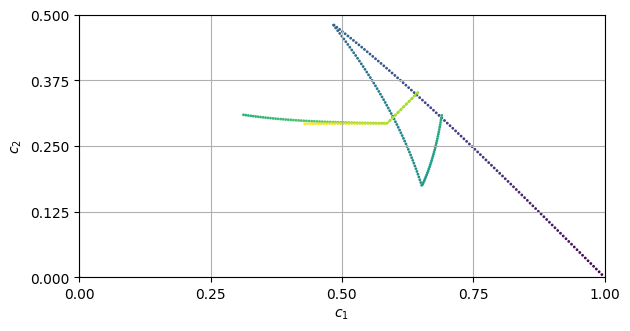

In [204]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 1)

for idx, (c, g) in enumerate(zip(c_values, g_values)):
    ax = axes  # Get the correct subplot
    t = np.linspace(0, t_max, 300)
    c1_vals, c2_vals = [], []

    for time in t:
        c1, c2, c3 = flow_c(time, c, g)
        # enforce symmetry
        # c1 = 1 - c1 if c1 > 0.5 else c1
        c1_vals.append(c1)
        c2_vals.append(c2)

    # Plot the flow for c1 vs c2
    # ax.plot(c1_vals, c2_vals, color="black", linewidth=1)
    # color the flow based on time
    ax.scatter(c1_vals, c2_vals, c=t, cmap="viridis", s=1)

    # Set titles and labels to match the example
    ax.set_xlabel(r"$c_1$")
    ax.set_ylabel(r"$c_2$")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 0.5])
    ax.grid(True)
    # set num ticks, 5 total on each axis
    ax.set_xticks(np.linspace(0, 1, 5))
    ax.set_yticks(np.linspace(0, 0.5, 5))

    # set axes to be equal length
    ax.set_aspect("equal")

# Final adjustments to the layout
plt.tight_layout()
plt.show()

In [205]:
H = np.pi / 2 * (a.dag() * b + a * b.dag())
U = (-1j * H).expm()
U

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

In [206]:
H = np.pi / 2 * (a.dag() * b + a * b.dag()) + (np.pi / 8 * iz) + (np.pi / 8 * zi)
H = np.pi / 2 * (a.dag() * b + a * b.dag()) + (np.pi / 8 * ix) + (np.pi / 8 * xi)

U = (-1j * H).expm()
print(c1c2c3(U))
U

(0.5, 0.46841569, 0.03158431)


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.88098804+0.06702143j -0.22400473-0.22400473j -0.22400473-0.22400473j
  -0.11901196+0.06702143j]
 [-0.22400473-0.22400473j -0.06702143+0.11901196j -0.06702143-0.88098804j
  -0.22400473-0.22400473j]
 [-0.22400473-0.22400473j -0.06702143-0.88098804j -0.06702143+0.11901196j
  -0.22400473-0.22400473j]
 [-0.11901196+0.06702143j -0.22400473-0.22400473j -0.22400473-0.22400473j
   0.88098804+0.06702143j]]

In [230]:
from qutip import commutator

comm1 = (iz + 0.5 * zi) / 4
comm2 = (xx + yy) / 2
Uerr = (-1j * commutator(comm1, comm2)).expm()
print(c1c2c3(Uerr))
Uerr

(0.0, 0.0, 0.0)


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.       +0.j         0.       +0.j         0.       +0.j
  0.       +0.j        ]
 [0.       +0.j         1.0314131+0.j         0.       +0.25261232j
  0.       +0.j        ]
 [0.       +0.j         0.       -0.25261232j 1.0314131+0.j
  0.       +0.j        ]
 [0.       +0.j         0.       +0.j         0.       +0.j
  1.       +0.j        ]]